# Business Understanding

*__Churn Prediction__*

```identifying customers who are likely to cancel their contracts soon.```

* If the company can do that, it can handle users before churn
* The target variable that we want to predict is categorical and has only two possible outcomes:
churn or not churn (Binary Classification).
* I also would like to understand why the model thinks our customers
churn, and for that, we need to be able to interpret the model’s predictions.

* I will use data from https://www.kaggle.com/blastchar/telco-customer-churn.

* According to the description, this dataset has the following information:
    * __Services of the customers__: phone; multiple lines; internet; tech support and extra services such as online security, backup, device protection, and TV streaming
    * __Account information__: how long they have been clients, type of contract, type of
payment method
    * __Charges__: how much the client was charged in the past month and in total
    * __Demographic information__: gender, age, and whether they have dependents or a partner
    * __Churn__: yes/no, whether the customer left the company within the past month

# Initial Data Preparation
### `Import libraries`

In [157]:
import numpy as np
# Data frame
import pandas as pd
# viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# missing values and oultiers
import missingno as msg
# data generation
from imblearn.over_sampling import SMOTE
# dimenisonality reduction
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
# spliting data
from sklearn.model_selection import train_test_split
# preprocessing and feature transformation 
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import PowerTransformer,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn_features.transformers import DataFrameSelector
# validtion data
from sklearn.model_selection import cross_val_score
# moodels
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
# all model in one at first then make tuning
from lazypredict.Supervised import LazyClassifier
#classfication metrics
from sklearn.metrics import recall_score,confusion_matrix
# deploy
import joblib

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [170]:
df["paymentmethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [5]:
# numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [6]:
# caterogical columns
df.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


* customerID is not important to insights

In [7]:
df.drop(columns=["customerID"],axis=1,inplace=True)

* TotalCharges has prblem in data type should be integer

In [8]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
# the reason of problem
len(df[df["TotalCharges"]==" "])

11

In [10]:
# Convert the "TotalCharges" column to numeric and enforce white spaces to be 'NaN' 
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [11]:
len(df[df['TotalCharges']==' '])

0

In [12]:
df["TotalCharges"].isna().sum()

11

In [13]:
# hanle column names
df.columns=df.columns.str.lower()
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### Senior Citizen
> To be treated as category

In [14]:
df["seniorcitizen"].unique()

array([0, 1], dtype=int64)

In [15]:
df["seniorcitizen"]=df["seniorcitizen"].map({
    0:"No",
    1:"Yes"
})

In [16]:
df["churn"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df["churn"]=df["churn"].map({
    "No":0,
    "Yes":1
})

In [18]:
df["churn"].unique()

array([0, 1], dtype=int64)

In [19]:
df["seniorcitizen"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
# check nulls
df.isna().sum().sort_values(ascending=False)

totalcharges        11
gender               0
seniorcitizen        0
monthlycharges       0
paymentmethod        0
paperlessbilling     0
contract             0
streamingmovies      0
streamingtv          0
techsupport          0
deviceprotection     0
onlinebackup         0
onlinesecurity       0
internetservice      0
multiplelines        0
phoneservice         0
tenure               0
dependents           0
partner              0
churn                0
dtype: int64

* totalcharges has some nans will be handled in data prepration

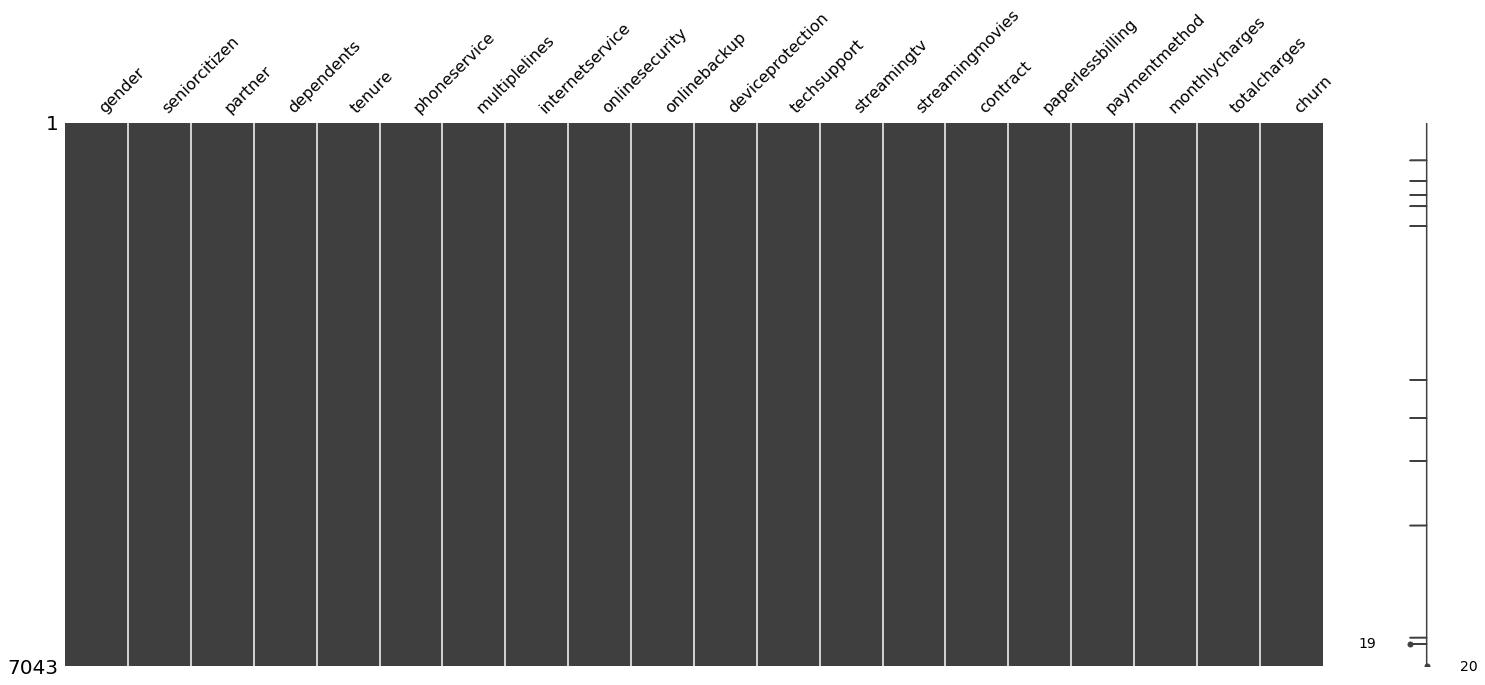

In [21]:
msg.matrix(df);

In [22]:
#ckeck duplicated
df.duplicated().sum()

22

In [23]:
# i will drop this duplicates
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

# EDA

In [25]:
numerical_features=df.select_dtypes(include="number").drop("churn",axis=1).columns.to_list()
caterogical_features=df.select_dtypes(exclude="number").columns.to_list()

In [26]:
numerical_features

['tenure', 'monthlycharges', 'totalcharges']

In [27]:
caterogical_features

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

## univariate analysis

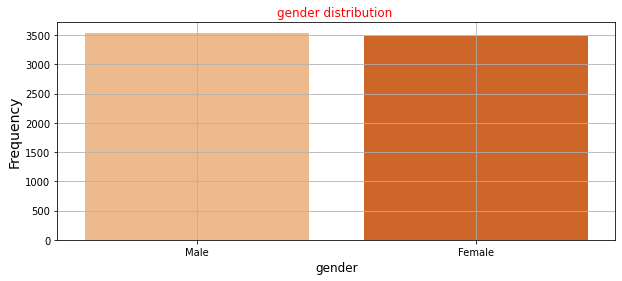

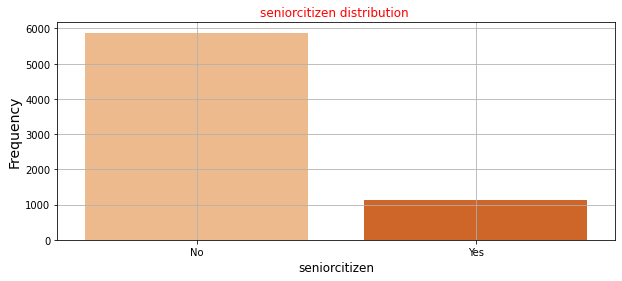

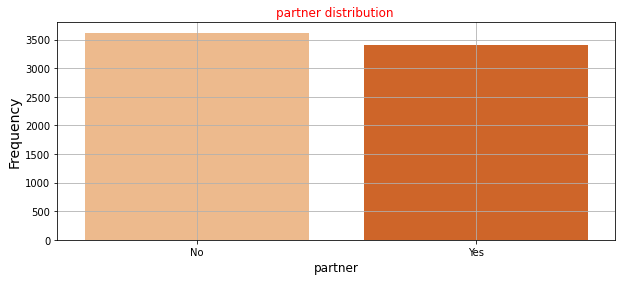

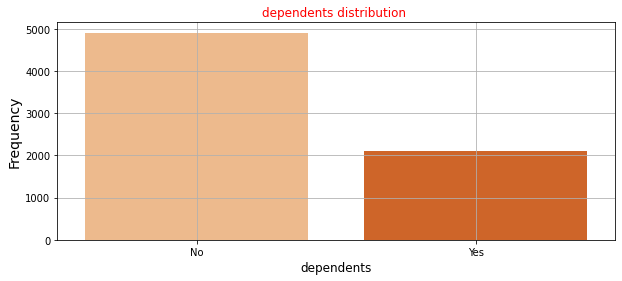

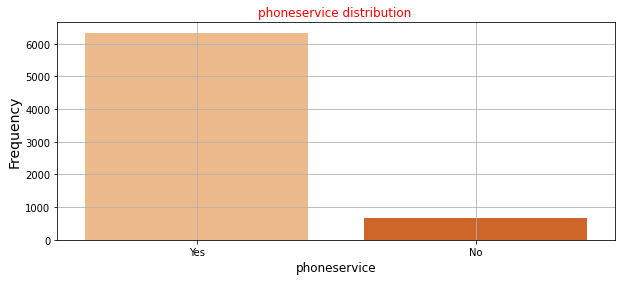

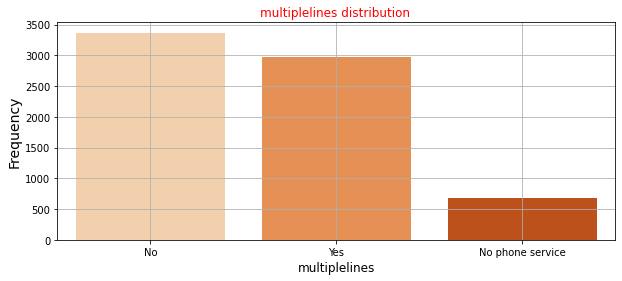

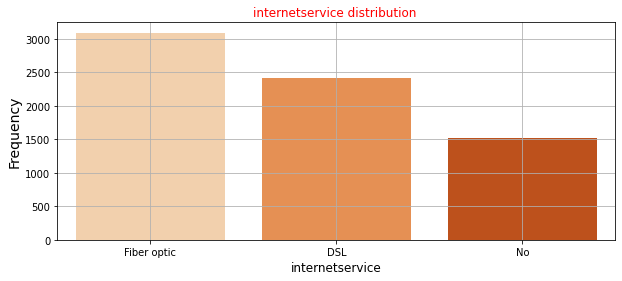

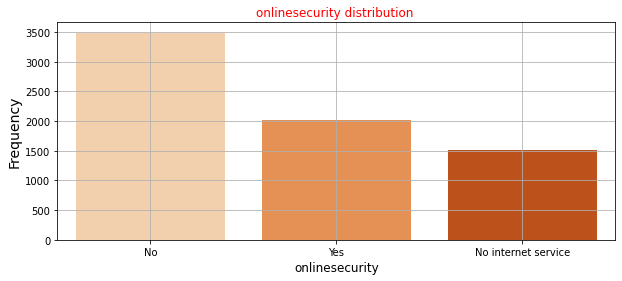

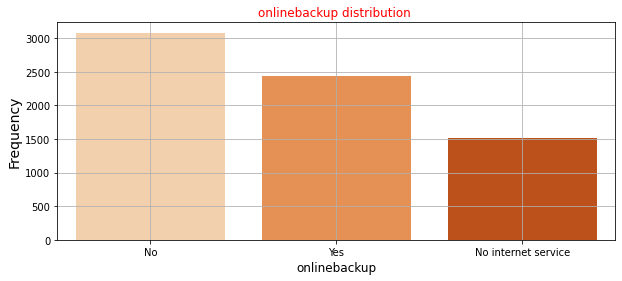

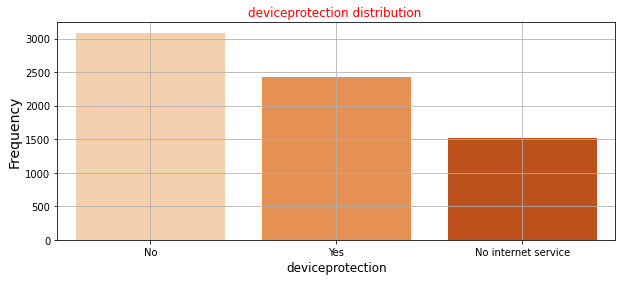

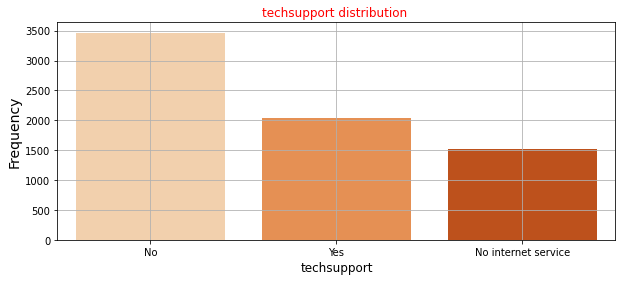

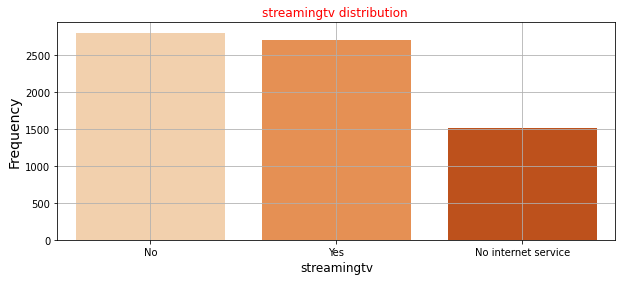

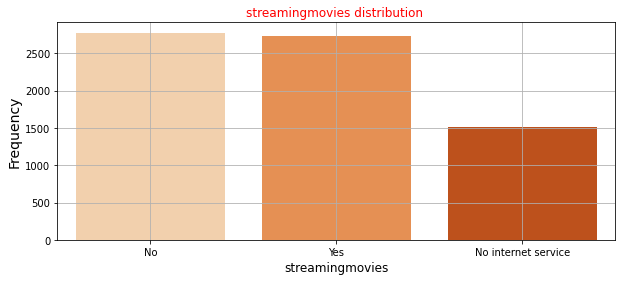

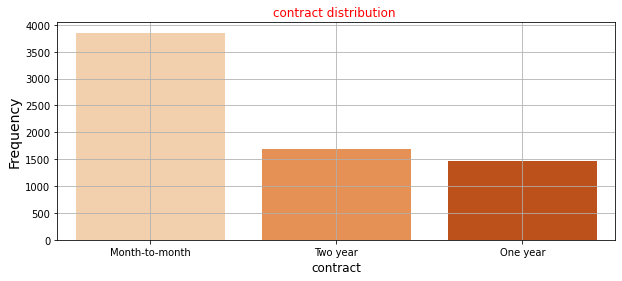

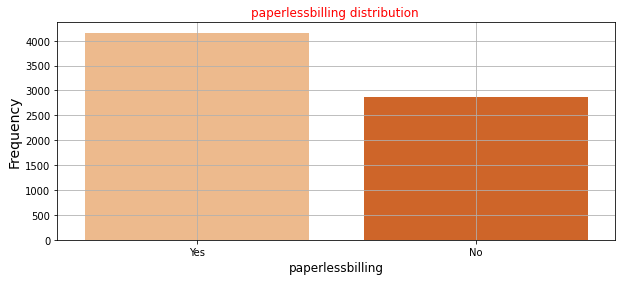

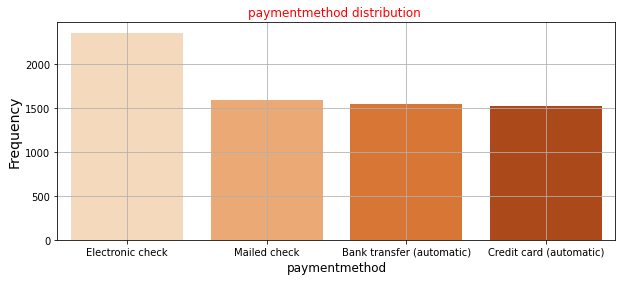

In [28]:
for feature in caterogical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df,x=feature,palette="Oranges",order=df[feature].value_counts().index)
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

In [29]:
df["churn"].value_counts()

0    5164
1    1857
Name: churn, dtype: int64

In [30]:
df["churn"].value_counts(normalize=True)

0   0.74
1   0.26
Name: churn, dtype: float64

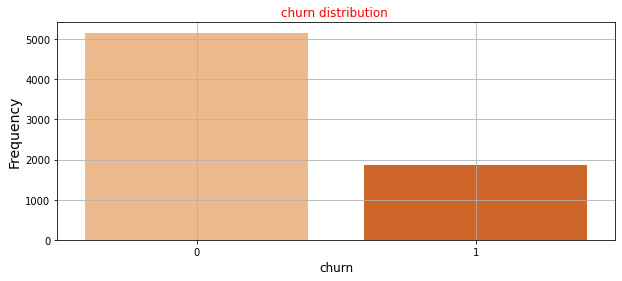

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x="churn",palette="Oranges",order=df["churn"].value_counts().index)
plt.xlabel("churn",fontsize=12,color="black")
plt.ylabel("Frequency",fontsize=14,color="black")
plt.title("churn distribution ",fontsize=12,color="red")
plt.grid()
plt.show()

* this is imbalnced data has to be make smote

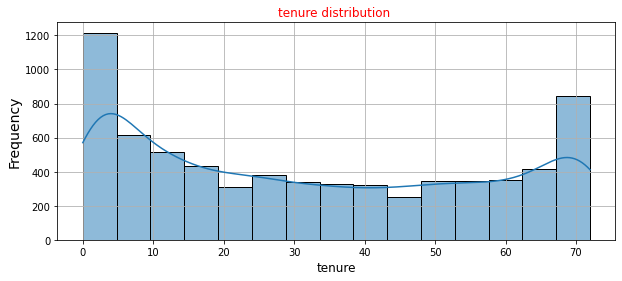

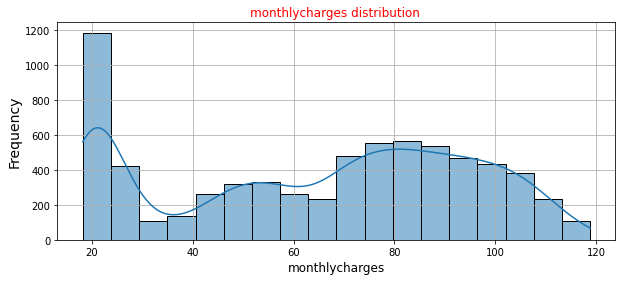

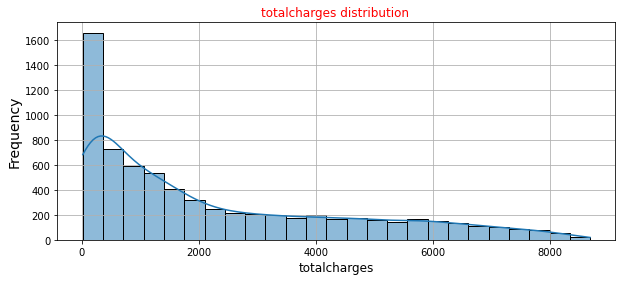

In [32]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df,x=feature,palette="Oranges",kde=True)
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

* we has right swkennes --> will make scaling with power transform in preproceesing

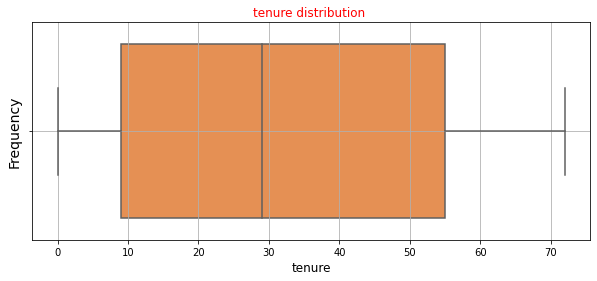

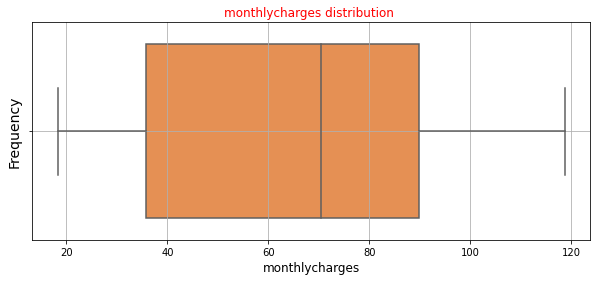

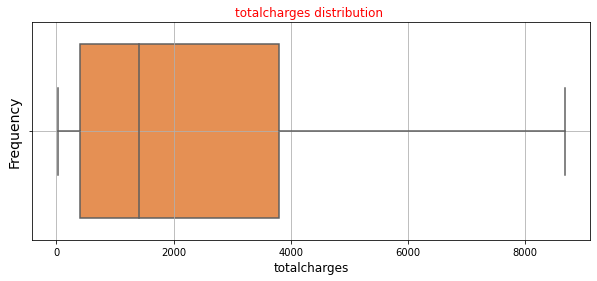

In [33]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df,x=feature,palette="Oranges")
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

* no outlier in numerical features

## bivariate analysis

<Figure size 720x288 with 0 Axes>

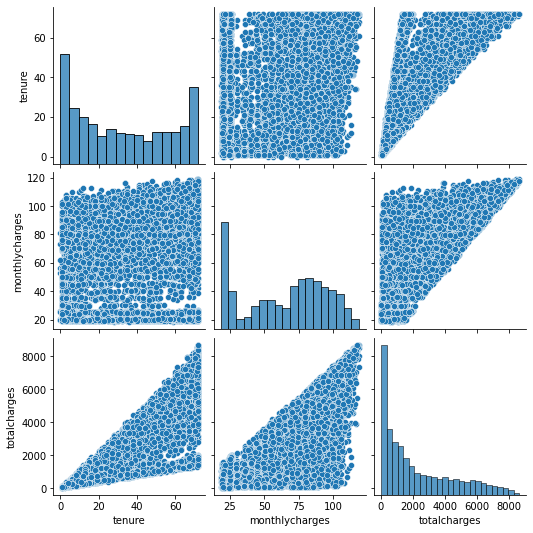

In [34]:
plt.figure(figsize=(10,4))
sns.pairplot(data=df[numerical_features])
plt.show()

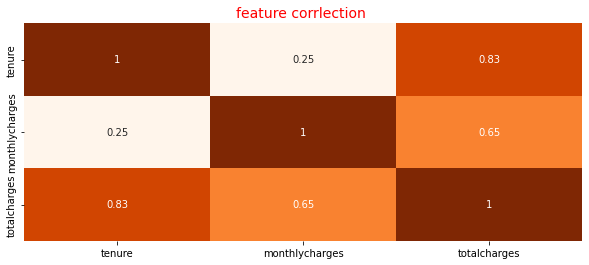

In [35]:
plt.figure(figsize=(10,4))
plt.title("feature corrlection ",fontsize=14,color="red")
sns.heatmap(df[numerical_features].corr(),annot=True,cbar=False,cmap="Oranges")
plt.show()

* tenure,totalcharges has strong corrlection

In [36]:
df["churn"].value_counts(normalize=True)

0   0.74
1   0.26
Name: churn, dtype: float64

In [37]:
df.groupby(["churn"])[["tenure", "monthlycharges", "totalcharges"]].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.64,61.34,2560.26
1,18.09,74.60,1541.38


In [38]:
px.box(data_frame=df,x="tenure",color="churn",color_discrete_sequence=px.colors.qualitative.Dark24_r)

In [39]:
px.box(data_frame=df,x="monthlycharges",color="churn",color_discrete_sequence=px.colors.qualitative.Dark24_r)

In [40]:
px.box(data_frame=df,x="totalcharges",color="churn",color_discrete_sequence=px.colors.qualitative.Dark24_r)

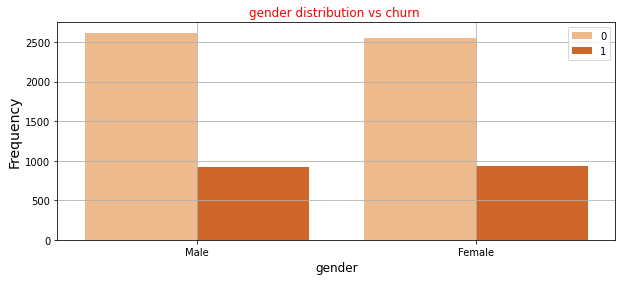

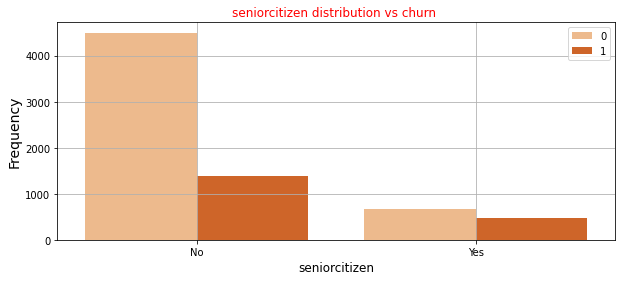

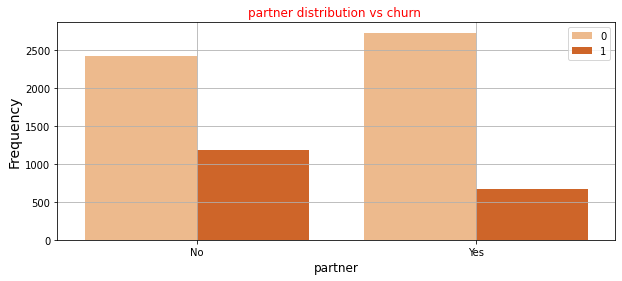

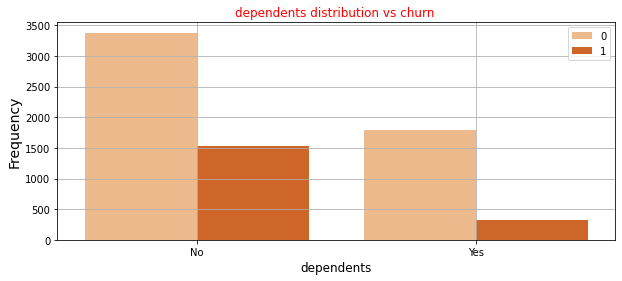

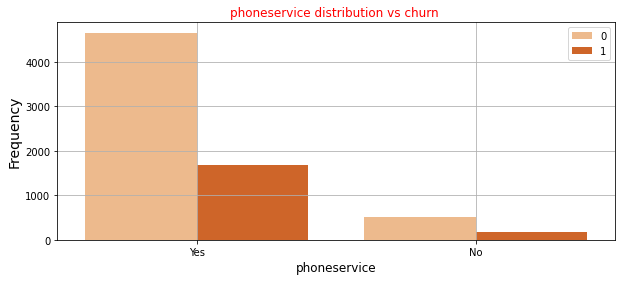

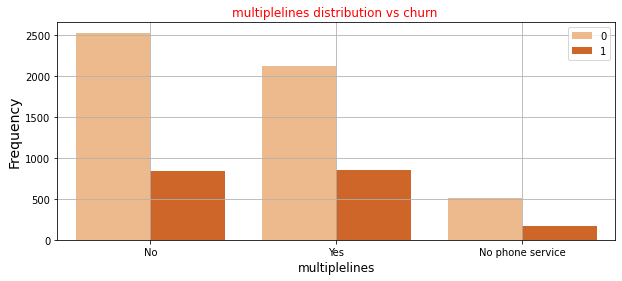

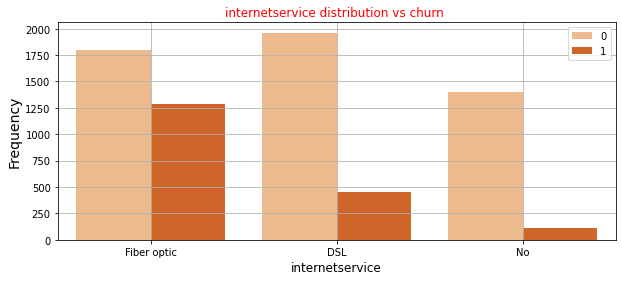

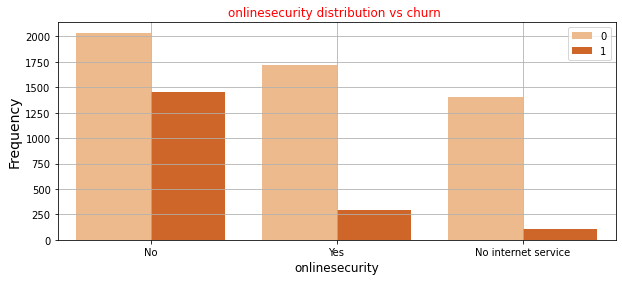

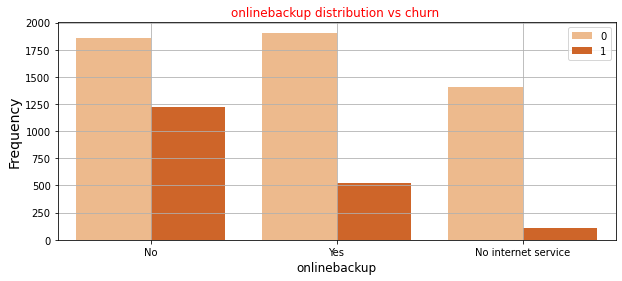

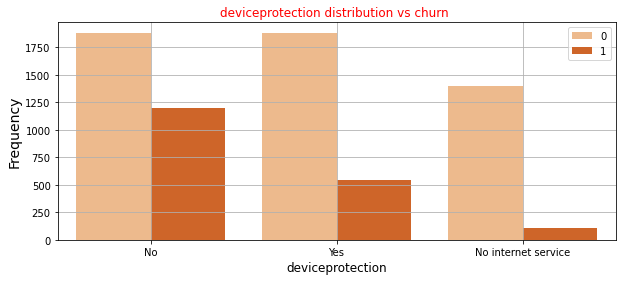

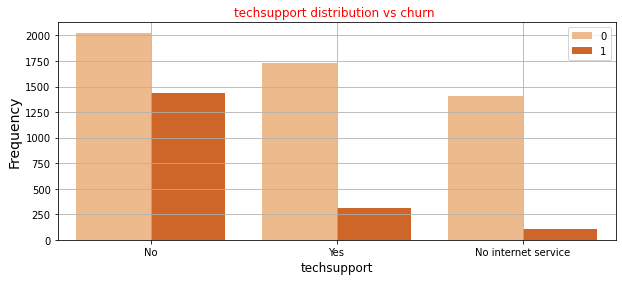

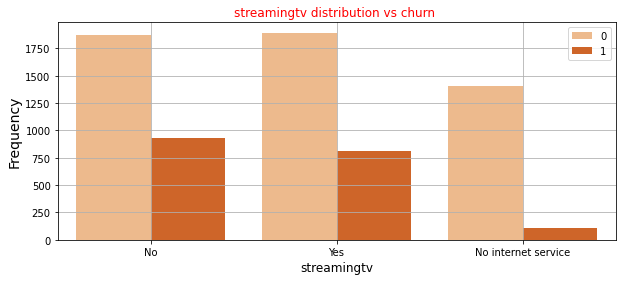

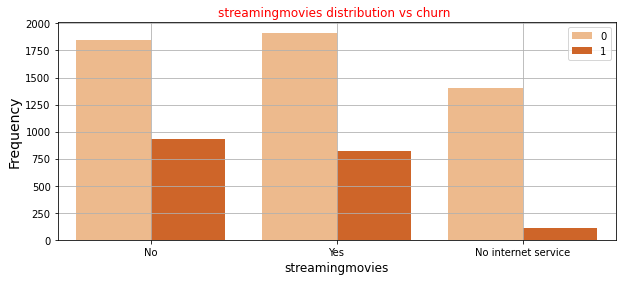

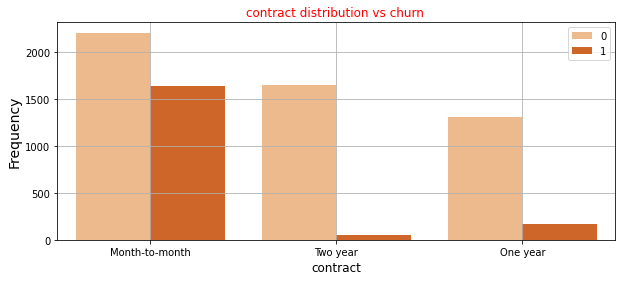

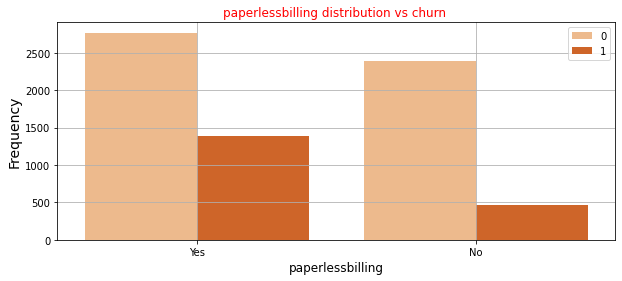

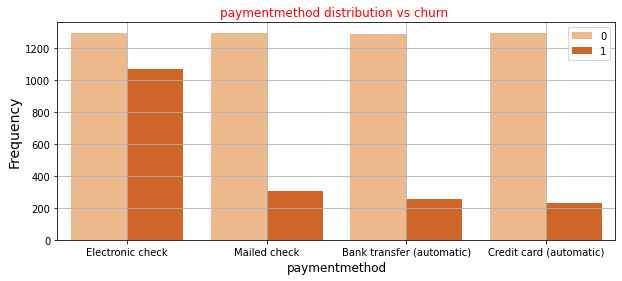

In [41]:
for feature in caterogical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df,x=feature,palette="Oranges",order=df[feature].value_counts().index,hue="churn")
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution vs churn ",fontsize=12,color="red")
    plt.legend()
    plt.grid()
    plt.show()

In [42]:
caterogical_features

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [43]:
pd.crosstab(df["churn"],df["paymentmethod"],normalize=True)

paymentmethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
0,0.18,0.18,0.18,0.18
1,0.04,0.03,0.15,0.04


* most of people left company in Electronic check paymentmethod

In [44]:
pd.crosstab(df["churn"],df["contract"],normalize=True)

contract,Month-to-month,One year,Two year
churn,,,
0,0.31,0.19,0.23
1,0.23,0.02,0.01


* most of people left company in Month-to-month contract

In [45]:
pd.crosstab(df["churn"],df["seniorcitizen"],normalize=True)

seniorcitizen,No,Yes
churn,,
0,0.64,0.09
1,0.20,0.07


* most of people left company in NoT seniorcitizen

# Multivariate Analysis

In [46]:
pd.pivot_table(data=df,index="churn",columns=["contract"],values="totalcharges",aggfunc="mean")

contract,Month-to-month,One year,Two year
churn,,,
0,1528.72,2903.57,3678.99
1,1172.61,4066.21,5432.36


In [47]:
px.box(data_frame=df,y="totalcharges",x="churn",facet_col="contract",color_discrete_sequence=px.colors.qualitative.Dark24_r)

In [48]:
px.box(data_frame=df,y="totalcharges",x="churn",facet_col="dependents",color_discrete_sequence=px.colors.qualitative.Dark24_r)

In [49]:
numerical_features

['tenure', 'monthlycharges', 'totalcharges']

In [50]:
px.scatter(data_frame=df,x="tenure",y="totalcharges",color="churn",facet_col="contract",color_discrete_sequence=px.colors.qualitative.Dark24_r)

In [51]:
px.scatter(data_frame=df,x="monthlycharges",y="totalcharges",color="churn",facet_col="contract",color_discrete_sequence=px.colors.qualitative.Dark24_r)

In [52]:
px.histogram(data_frame=df,x="totalcharges",facet_col="churn",facet_row="seniorcitizen",color_discrete_sequence=px.colors.qualitative.Dark24_r)

# Spliting data 

In [53]:
X=df.drop("churn",axis=1)
y=df["churn"]

In [54]:
X.shape,y.shape

((7021, 19), (7021,))

In [55]:
# split data to train,test 
# train will be portion in cross validation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,stratify=y,shuffle=True,random_state=45)

In [56]:
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (5616, 19)
y_train.shape 	 (5616,)
******************************
X_test.shape 	 (1405, 19)
y_test.shape 	 (1405,)


## Data preprocessing 

In [57]:
num_cols=X.select_dtypes(include="number").columns.to_list()
cat_cols=X.select_dtypes(exclude="number").columns.to_list()

In [58]:
cat_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(cat_cols)),
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encoder",OrdinalEncoder())
])
num_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(num_cols)),
    ("impute",SimpleImputer(strategy="mean")),
    ("tranform",PowerTransformer(standardize=True))
])
all_pipe=FeatureUnion(transformer_list=[
    ("caterogical_pipline",cat_pipe),
    ("numerical_pipline",num_pipe)
])
X_train=all_pipe.fit_transform(X_train)
X_test=all_pipe.transform(X_test)

## Data Generation

In [59]:
y_train.value_counts()

0    4131
1    1485
Name: churn, dtype: int64

In [60]:
S=SMOTE()
X_train,y_train=S.fit_resample(X_train,y_train)

In [61]:
y_train.value_counts()

0    4131
1    4131
Name: churn, dtype: int64

## feature selection

# tecinques
* random froseset  --> make id as noise column and drop all have feature less then him 
* heatmap corrlection
* pca


In [140]:
X_train_with_noise=np.c_[X_train,np.random.rand(X_train.shape[0],1)]
X_test_with_noise=np.c_[X_test,np.random.rand(X_test.shape[0],1)]

In [141]:
forst_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=45)
forst_clf.fit(X_train_with_noise, y_train)

RandomForestClassifier(max_depth=10, random_state=45)

In [142]:
columns_sorted=cat_cols+num_cols+["random_column"]

In [143]:
forst_clf.feature_importances_

array([0.01762607, 0.01572388, 0.02910477, 0.03581118, 0.00608989,
       0.01222727, 0.04573854, 0.06662858, 0.02598668, 0.00971314,
       0.07595964, 0.01000224, 0.01104197, 0.19419071, 0.05774506,
       0.05142101, 0.13145394, 0.08495753, 0.08306141, 0.0355165 ])

In [144]:
pd.Series(forst_clf.feature_importances_,index=columns_sorted).sort_values(ascending=False)

contract           0.19
tenure             0.13
monthlycharges     0.08
totalcharges       0.08
techsupport        0.08
onlinesecurity     0.07
paperlessbilling   0.06
paymentmethod      0.05
internetservice    0.05
dependents         0.04
random_column      0.04
partner            0.03
onlinebackup       0.03
gender             0.02
seniorcitizen      0.02
multiplelines      0.01
streamingmovies    0.01
streamingtv        0.01
deviceprotection   0.01
phoneservice       0.01
dtype: float64

In [146]:
important_columns=pd.Series(forst_clf.feature_importances_,index=columns_sorted).sort_values(ascending=False).loc[:"random_column"].drop("random_column").index.tolist()

In [147]:
important_columns

['contract',
 'tenure',
 'monthlycharges',
 'totalcharges',
 'techsupport',
 'onlinesecurity',
 'paperlessbilling',
 'paymentmethod',
 'internetservice',
 'dependents']

In [150]:
# convert X_train_with_noise to data frame
X_train_with_noise=pd.DataFrame(X_train_with_noise,columns=columns_sorted)
X_test_with_noise=pd.DataFrame(X_test_with_noise,columns=columns_sorted)

In [151]:
X_train_with_out_noise=X_train_with_noise.loc[:,important_columns]
X_test_with_out_noise=X_test_with_noise.loc[:,important_columns]

-------------------

In [67]:
pca_full_features=PCA(n_components=None)
pca_full_features.fit(X_train)
sum(pca_full_features.explained_variance_ratio_)


1.0000000000000002

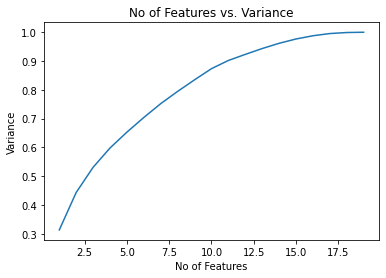

In [68]:
## Let's get the cumsum of the explained var ratio
cumsum_pca = np.cumsum(pca_full_features.explained_variance_ratio_)

## plotting
plt.plot(range(1, len(cumsum_pca) + 1), cumsum_pca)
plt.title('No of Features vs. Variance')
plt.xlabel('No of Features')
plt.ylabel('Variance')
plt.show()

In [69]:
pca_16=PCA(n_components=16)
pca_16.fit(X_train)
sum(pca_16.explained_variance_ratio_)

0.9878199184424512

---------------------

In [70]:
df.corr()

,tenure,monthlycharges,totalcharges,churn
tenure,1.00,0.25,0.83,-0.35
monthlycharges,0.25,1.00,0.65,0.19
totalcharges,0.83,0.65,1.00,-0.20
churn,-0.35,0.19,-0.20,1.00


* totalcharges , tenure has strong corrlection (83)
* totalcharges , churn has  corrlection (-35) >  tenure , churn has  corrlection (-35)
* so if you want to drop one columns from it should be tenure

---------------------

* `final role i will depend on import columns that get from features important`

## Buliding Models

* focus on false negative --> recall

* choose models to be tuned

In [71]:
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
Models,Predictions=clf.fit(X_train,X_test,y_train,y_test)
print(Models)

100%|██████████| 29/29 [00:19<00:00,  1.46it/s]

[LightGBM] [Info] Number of positive: 4131, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2712
[LightGBM] [Info] Number of data points in the train set: 8262, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.75               0.76     0.76      0.76   
CalibratedClassifierCV             0.75               0.76     0.76      0.76   
RidgeClassifierCV                  0.74               0.76     0.76      0.76   
RidgeClassifier                    0.74               0.76     0.76      0.76   
LogisticRegres

# LogisticRegression

In [86]:
# inalization for models
LR_clf = LogisticRegression(penalty="l2",C=8,random_state=45,max_iter=10000)
LR_clf.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_LR_clf = LR_clf.predict(X_train)
y_pred_test_LR_clf = LR_clf.predict(X_test)

## Evaluate
score_train_LR = recall_score(y_train, y_pred_train_LR_clf)
score_test_LR = recall_score(y_test, y_pred_test_LR_clf)

print(f'recall Score for Training Dataset using Logistic Regression  {score_train_LR * 100 :.3f}')
print(f'recall Score for Testing Dataset using Logistic Regression  {score_test_LR * 100 :.3f}')

recall Score for Training Dataset using RF  79.569
recall Score for Testing Dataset using RF  78.226


## Confusion Matrix

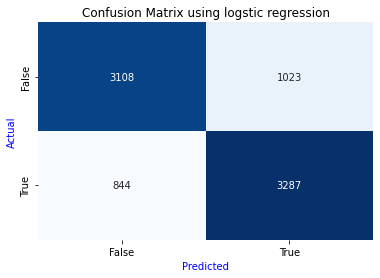

In [82]:
confusion_matrix_score = confusion_matrix(y_train, y_pred_train_LR_clf)
## plotting
sns.heatmap(confusion_matrix_score, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using logstic regression', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

## croos validation

In [91]:
scores_LR = cross_val_score(estimator=LR_clf, X=X_train, y=y_train, cv=5, scoring='recall')
print(scores_LR)

[0.77360775 0.7738815  0.80871671 0.81476998 0.80871671]


---------------------------------

# RandomForestClassifier

In [87]:
# inalization for models
forst_clf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=3,min_samples_split=30,min_samples_leaf=50,max_features=10, random_state=45)
forst_clf.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_forest = forst_clf.predict(X_train)
y_pred_test_forest = forst_clf.predict(X_test)

## Evaluate
score_train_forest = recall_score(y_train, y_pred_train_forest)
score_test_forest = recall_score(y_test, y_pred_test_forest)

print(f'recall Score for Training Dataset using RandomForest Classifier  {score_train_forest * 100 :.3f}')
print(f'recall Score for Testing Dataset using RandomForestClassifier  {score_test_forest * 100 :.3f}')


recall Score for Training Dataset using RandomForest Classifier  87.896
recall Score for Testing Dataset using RandomForestClassifier  85.484


## Confusion Matrix

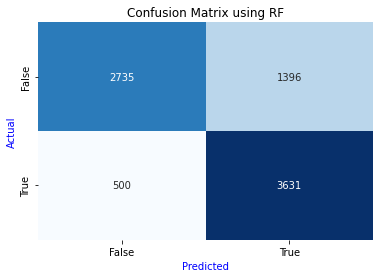

In [88]:
## plotting
confusion_matrix_train_forest = confusion_matrix(y_train, y_pred_train_forest)
sns.heatmap(confusion_matrix_train_forest, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using RF', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

## croos validation

In [89]:
scores_forest = cross_val_score(estimator=forst_clf, X=X_train, y=y_train, cv=5, scoring='recall')
print(scores_forest)

[0.83171913 0.83917775 0.88135593 0.89346247 0.8874092 ]


------------------------------

# SVC

In [90]:
# inalization for models on full future
# svc = SVC(C=0.2,kernel="rbf",gamma=.15)
svc = SVC(C=0.000001,kernel="poly",degree=20)
svc.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_svc = svc.predict(X_train)
y_pred_test_svc = svc.predict(X_test)

## Evaluate
score_train_svc = recall_score(y_train, y_pred_train_svc)
score_test_svc = recall_score(y_test, y_pred_test_svc)

print(f'recall_score Score for Training Dataset using SVC  {score_train_svc * 100 :.3f}')
print(f'recall_score Score for Testing Dataset using SVC  {score_test_svc * 100 :.3f}')


recall_score Score for Training Dataset using SVC  98.838
recall_score Score for Testing Dataset using SVC  93.011


* this model on important features only

In [152]:
svc_important = SVC(C=0.000001,kernel="poly",degree=20)
svc_important.fit(X_train_with_out_noise, y_train)

## Predict and evaluate 
y_pred_train_svc_important = svc_important.predict(X_train_with_out_noise)
y_pred_test_svc_important = svc_important.predict(X_test_with_out_noise)

## Evaluate
score_train_svc_important = recall_score(y_train, y_pred_train_svc_important)
score_test_svc_important = recall_score(y_test, y_pred_test_svc_important)

print(f'recall_score Score for Training Dataset using SVC important  {score_train_svc_important * 100 :.3f}')
print(f'recall_score Score for Testing Dataset using SVC important  {score_test_svc_important * 100 :.3f}')

recall_score Score for Training Dataset using SVC important  97.676
recall_score Score for Testing Dataset using SVC important  96.774


## Confusion Matrix

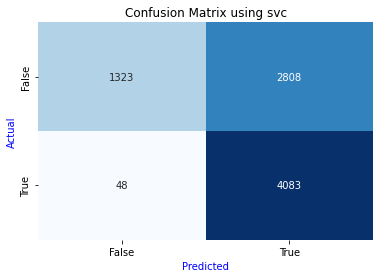

In [92]:
## plotting
confusion_matrix_train_svc = confusion_matrix(y_train, y_pred_train_svc)
sns.heatmap(confusion_matrix_train_svc, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using svc', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

## croos validation

In [93]:
scores_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=5, scoring='recall')
print(scores_svc)

[0.97820823 0.97823458 0.98910412 0.98910412 0.98910412]


--------------------------------------------------------

# Navie bayes

In [94]:
NB = GaussianNB()
NB.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_NB = NB.predict(X_train)
y_pred_test_NB = NB.predict(X_test)

## Evaluate
score_train_NB = recall_score(y_train, y_pred_train_NB)
score_test_NB = recall_score(y_test, y_pred_test_NB)

print(f'recall_score Score for Training Dataset using NB  {score_train_NB * 100 :.3f}')
print(f'recall_score Score for Testing Dataset using NB  {score_test_NB * 100 :.3f}')


recall_score Score for Training Dataset using NB  80.925
recall_score Score for Testing Dataset using NB  80.108


## Confusion Matrix

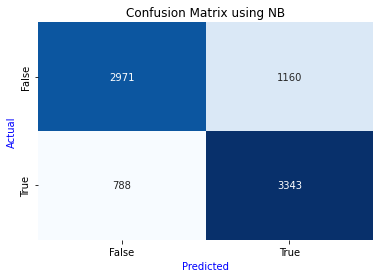

In [96]:
confusion_matrix_train_NB = confusion_matrix(y_train, y_pred_train_NB)
## plotting
sns.heatmap(confusion_matrix_train_NB, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using NB', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

## croos validation

In [97]:
scores_NB= cross_val_score(estimator=NB, X=X_train, y=y_train, cv=5, scoring='recall')
print(scores_NB)

[0.77723971 0.77509069 0.83171913 0.82324455 0.82566586]


--------------------------------------

# AdaBoostClassifier

In [98]:
# inalization for models
AdaBoostClassifier_clf = AdaBoostClassifier(n_estimators=50,learning_rate=0.5, random_state=45)
AdaBoostClassifier_clf.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_AdaBoostClassifier_clf = AdaBoostClassifier_clf.predict(X_train)
y_pred_test_AdaBoostClassifier_clf= AdaBoostClassifier_clf.predict(X_test)

## Evaluate
score_train_AdaBoostClassifier_clf = recall_score(y_train, y_pred_train_AdaBoostClassifier_clf)
score_test_AdaBoostClassifier_clf = recall_score(y_test, y_pred_test_AdaBoostClassifier_clf)

print(f'recall Score for Training Dataset using AdaBoostClassifier_clf  {score_train_AdaBoostClassifier_clf * 100 :.3f}')
print(f'recall Score for Testing Dataset using AdaBoostClassifier_clf  {score_test_AdaBoostClassifier_clf * 100 :.3f}')


recall Score for Training Dataset using RF  86.589
recall Score for Testing Dataset using RF  77.419


## confusion matrix

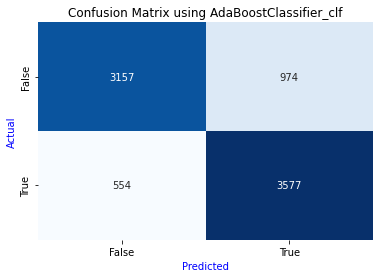

In [99]:
confusion_matrix_train_AdaBoostClassifier_clf= confusion_matrix(y_train, y_pred_train_AdaBoostClassifier_clf)
## plotting
sns.heatmap(confusion_matrix_train_AdaBoostClassifier_clf, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using AdaBoostClassifier_clf', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

## croos validation

In [100]:
scores_AdaBoostClassifier_clf = cross_val_score(estimator=AdaBoostClassifier_clf, X=X_train, y=y_train, cv=5, scoring='recall')
print(scores_AdaBoostClassifier_clf)

[0.73123487 0.78960097 0.91041162 0.92009685 0.89588378]


------------------

# knn

In [102]:
knn_clf = KNeighborsClassifier(n_neighbors=25, p=4, n_jobs=-1)
knn_clf.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_knn_clf = knn_clf.predict(X_train)
y_pred_test_knn_clf = knn_clf.predict(X_test)

## Evaluate
score_train_knn_clf = recall_score(y_train, y_pred_train_knn_clf)
score_test_knn_clf = recall_score(y_test, y_pred_test_knn_clf)

print(f'recall Score for Training Dataset using knn_clf  {score_train_knn_clf * 100 :.3f}')
print(f'recall Score for Testing Dataset using knn_clf  {score_test_knn_clf * 100 :.3f}')


recall Score for Training Dataset using knn_clf  89.542
recall Score for Testing Dataset using knn_clf  82.527


## confusion matrix

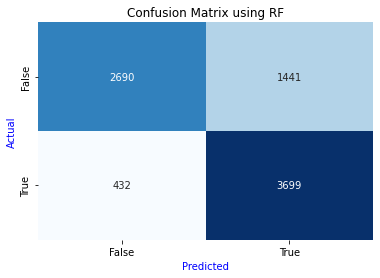

In [103]:
confusion_matrix_train_knn_clf = confusion_matrix(y_train, y_pred_train_knn_clf)
## plotting
sns.heatmap(confusion_matrix_train_knn_clf, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using RF', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

## croos validation

In [ ]:
scores_knn_clf = cross_val_score(estimator=knn_clf, X=X_train, y=y_train, cv=5, scoring='recall')
print(scores_knn_clf)

---------------------

# XGBOOST

In [116]:
xgb_classifier = xgb.XGBClassifier( max_depth=2,
    learning_rate=0.1,
    n_estimators=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=10)
xgb_classifier.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_xgb_classifier = xgb_classifier.predict(X_train)
y_pred_test_xgb_classifier = xgb_classifier.predict(X_test)

## Evaluate
score_train_xgb_classifier = recall_score(y_train, y_pred_train_xgb_classifier)
score_test_xgb_classifier = recall_score(y_test, y_pred_test_xgb_classifier)

print(f'recall_score for Training Dataset using xgb_classifier  {score_train_xgb_classifier * 100 :.3f}')
print(f'recall_score for Testing Dataset using xgb_classifier  {score_test_xgb_classifier * 100 :.3f}')

recall_score for Training Dataset using xgb_classifier  90.123
recall_score for Testing Dataset using xgb_classifier  87.634


## confusion matrix

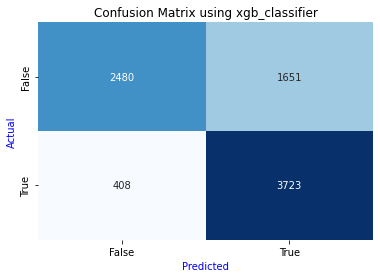

In [117]:
confusion_matrix_train_xgb_classifier = confusion_matrix(y_train, y_pred_train_xgb_classifier)
## plotting
sns.heatmap(confusion_matrix_train_xgb_classifier, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using xgb_classifier', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

## cross validation

In [118]:
scores_xgb_classifier = cross_val_score(estimator=xgb_classifier, X=X_train, y=y_train, cv=5, scoring='recall')
print(scores_xgb_classifier)

[0.83414044 0.82829504 0.92857143 0.9188862  0.90799031]


------------------------

# save the model

In [158]:
joblib.dump(svc_important,"svc_important.pkl")

['svc_important.pkl']